In [29]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

In [30]:
delta_time = 10.0 * 60.0 # Seconds
h_0 = 6.95700e8*2 # m SOLAR RADIUS
v_0 = 500.0 * 1e3 # m/s
a_0 = 25 # m/s

time = np.arange(0.0, 3.0*60.0*60, delta_time)
h = h_0 + (v_0 * time) + (0.5 * (time**2) * a_0)
v = v_0 + (time * a_0)

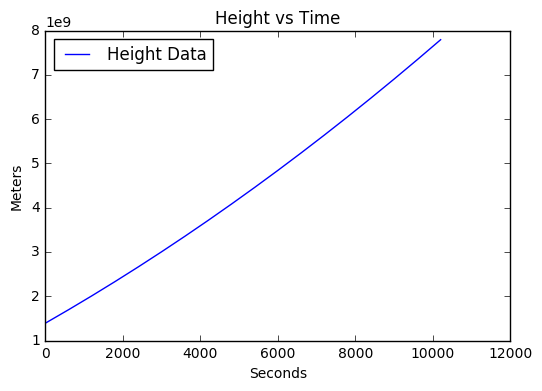

In [31]:
plt.title("Height vs Time")
plt.xlabel('Seconds')
plt.ylabel('Meters')
plt.plot(time, h, label='Height Data')
plt.legend(loc=2)

In [32]:
A = np.vstack([time, np.ones(len(time))]).T
lin = np.linalg.lstsq(A, h)[0]
A = np.vstack([time**2, time, np.ones(len(time))]).T
quad = np.linalg.lstsq(A, h)[0]

print('v=%f km/s, h=%f R_Sun' % (lin[0]/1000, lin[1]/6.95700e8))
print('a=%f m/s, v=%f km/s, h=%f R_Sun' % (quad[0]*2, quad[1]/1000, quad[2]/6.95700e8))

v=627.500000 km/s, h=1.706770 R_Sun
a=25.000000 m/s, v=500.000000 km/s, h=2.000000 R_Sun


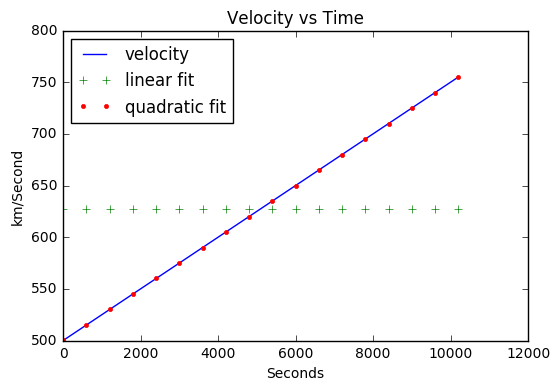

In [33]:
plt.title("Velocity vs Time")
plt.xlabel('Seconds')
plt.ylabel('km/Second')
plt.plot(time, v/1000, label="velocity")
plt.plot(time, np.repeat(lin[0]/1000, len(time)), '+', label="linear fit")
plt.plot(time, (quad[1] + (time * 2*quad[0]))/1000, '.', label="quadratic fit")
plt.legend(loc=2)

In [34]:
time * quad[0] + quad[1]

array([ 500000.,  507500.,  515000.,  522500.,  530000.,  537500.,
        545000.,  552500.,  560000.,  567500.,  575000.,  582500.,
        590000.,  597500.,  605000.,  612500.,  620000.,  627500.])